In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

NOT_COUNTRY = ["SIPRI TIV Million", "BBL/D/1K", "Tonnes", "IP", "KBps", "USD/Liter","Gigawatt-hour", "USD","Percent", "Thousand Tonnes", "points", "Points", "Persons", "doses per 100 people", "per 1000 people", "per one million people", "Companies", "Companies and Individuals", "Individuals", "persons"]

def crawl(url):
    page = url
    html = urlopen(page)

    bs = BeautifulSoup(html, 'html.parser')
    table = bs.find('table', {"class":"table table-hover table-heatmap"})
    country = []
    last = []
    previous = []
    i = 0

    for td in table.find_all('td'):
        t = td.text.strip()
        if any(c.isalpha()for c in t) and not any(c.isdigit() for c in t) and not any(s in t for s in NOT_COUNTRY): country.append(t)
        else:
            try:
                n = float(t)
                if i==0:
                    last.append(n)
                    i+=1
                else:
                    previous.append(n)
                    i-=1
            except ValueError: pass-[=]
    #print(len(country))
    #print(len(last))
    d = {'country': country, 'last':last, 'previoius':previous}
    df = pd.DataFrame(d)
    
    return df


## Data


### Main indicators:
1. `gdp` = gdp growth rate
2. `interst` = interst rate：
3. `inflation` = inflation rate
4. `unemploy` = unemployment rate
5. `cab2gdp` = current acoount balance (a country's inflow and outflow balance over gdp)

In [ ]:
gdp = crawl("https://tradingeconomics.com/country-list/gdp-growth-rate?continent=world")
interest = crawl("https://tradingeconomics.com/country-list/interest-rate?continent=world")
inflation = crawl("https://tradingeconomics.com/country-list/inflation-rate?continent=world")
unemploy = crawl("https://tradingeconomics.com/country-list/unemployment-rate?continent=world")
cab2gdp = crawl("https://tradingeconomics.com/country-list/current-account-to-gdp")

### Coronavirus and other health data
1. `cc` = total coronavirus cases in one country
2. `cd` = total coronavirus death in one country
3. `cvd` = coronavirus vaccination rate in one country
4. `hb` = hospital beds *per 1000 people*
5. `hospital` = hospitals *per one million people*
6. `icu` = icu *per 1000 people*
7. `doctors` = medical doctors *per 1000 people*
8. `nurses` = nurses *per 1000 people*
  
All data are by country

In [ ]:
cc = crawl("https://tradingeconomics.com/country-list/coronavirus-cases")
cd = crawl("https://tradingeconomics.com/country-list/coronavirus-deaths")
cvr = crawl("https://tradingeconomics.com/country-list/coronavirus-vaccination-rate")
hb = crawl("https://tradingeconomics.com/country-list/hospital-beds")
hospital = crawl("https://tradingeconomics.com/country-list/hospitals")
icu = crawl("https://tradingeconomics.com/country-list/icu-beds%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20")
doctor = crawl("https://tradingeconomics.com/country-list/medical-doctors")
nurse = crawl("https://tradingeconomics.com/country-list/nurses")


### GDP indicators
1. `gdp_annual_growth` = gdp annual growth rate
2. `gdp_per_capita` = gdp per capita: economic output of a nation per person
3. `gdpcppp` = gdp per capita (purchasing power parity): 人均gdp，但是用购买力衡量

In [ ]:
gdp_annual_growth = crawl("https://tradingeconomics.com/country-list/gdp-annual-growth-rate")
gdp_per_capita = crawl("https://tradingeconomics.com/country-list/gdp-per-capita")
gdpcppp = crawl("https://tradingeconomics.com/country-list/gdp-per-capita-ppp")


### Price indicators
1. `food_inflation` = food inflation
2. `cpi` = consumer price index
     * Note: Venezuela's cpi is measured in million points (others are in points)
3. `core_consumer_prices` = core consumer prices (changes in the price of goods and services, excluding food and energy), measured in points
4. `core_inflation` = core inflation inflation without food and energy sectors (%)
5. `harmonized` = harmonized consumer prices (inflation measurement in EU) in points
6. `inflation_expectation` = inflation expectation in %
7. `producer_price` = producer price in 
8. `producer_price_change` = producer price change
9. `ep` = export price
10. `imp` = import price

In [ ]:
food_inflation = crawl("https://tradingeconomics.com/country-list/food-inflation")
cpi = crawl("https://tradingeconomics.com/country-list/consumer-price-index-cpi")
core_consumer_prices = crawl("https://tradingeconomics.com/country-list/core-consumer-prices")
core_inflation = crawl("https://tradingeconomics.com/country-list/core-inflation-rate")
harmonized = crawl("https://tradingeconomics.com/country-list/harmonised-consumer-prices")
inflation_expectation = crawl("https://tradingeconomics.com/country-list/inflation-expectations")
producer_price = crawl("https://tradingeconomics.com/country-list/producer-prices")
producer_price_change = crawl("https://tradingeconomics.com/country-list/producer-prices-change")
ep = crawl("https://tradingeconomics.com/country-list/export-prices")
imp = crawl("https://tradingeconomics.com/country-list/import-prices")

### Business
1. `ip` = # of ip address
2. `inter_speed` = internet spped
3. `production` = change in industrial production compared to previous years
4. `e_production` = electricity production in gigawatt-hour
5. `m_production` = change in mining production
6. `s_production` = steel production in tonnes
7. `s_pmi` = service PMI
8. `oil_rigs` = # of rude oil rigs
9. `bankrupt` = # of bankruptcies (companies, individuals, or both)
10. `buz_confidence` = business confidence
11. `capacity_utilization` = production capacity utilized in a country

In [ ]:
ip = crawl("https://tradingeconomics.com/country-list/ip-addresses")
inter_speed = crawl("https://tradingeconomics.com/country-list/internet-speed")
production  = crawl("https://tradingeconomics.com/country-list/industrial-production")
e_production = crawl("https://tradingeconomics.com/country-list/electricity-production")
m_production = crawl("https://tradingeconomics.com/country-list/mining-production")
s_production = crawl("https://tradingeconomics.com/country-list/steel-production")
s_pmi = crawl("https://tradingeconomics.com/country-list/services-pmi")
oil_rigs = crawl("https://tradingeconomics.com/country-list/crude-oil-rigs")
bankrupt = crawl("https://tradingeconomics.com/country-list/bankruptcies")
buz_confidence = crawl("https://tradingeconomics.com/country-list/business-confidence")
capacity_utilization = crawl("https://tradingeconomics.com/country-list/capacity-utilization")



### Consumer indicators
1. `bank_lend` = change of interst rate in banks
2.  `consumer_confidence` = consumer confidence
3. `hdg` = summation of all household debt in one country to gdp
4.  `hdi` = household debt to (disposable) income
5.  `gasoline` = gaoline prices in USE/liter

In [ ]:
bank_lend = crawl("https://tradingeconomics.com/country-list/bank-lending-rate")
consumer_confidence = crawl("https://tradingeconomics.com/country-list/consumer-confidence")
hdg = crawl("https://tradingeconomics.com/country-list/households-debt-to-gdp")
hdi = crawl("https://tradingeconomics.com/country-list/households-debt-to-income")
gasoline = crawl("https://tradingeconomics.com/country-list/gasoline-prices")


### Housing starts
1. `house_own`: house ownership percentage
2. `construction` = change in construction outputs
3. `price2rent` = price to rent ratio (under 15 = buy over rent)

In [ ]:
house_own = crawl("https://tradingeconomics.com/country-list/home-ownership-rate")
construction = crawl("https://tradingeconomics.com/country-list/construction-output")
price2rent = crawl("https://tradingeconomics.com/country-list/price-to-rent-ratio")


### Money indicators
1. `cash_reserve` = cash reserve ratio 
2. `deposit_interst` = deposit interst
3. `interbank` = interbank rate (interst rate one bank borrow money from other banks)
4. `lending` = lending rate (interst rate at loan)
5. `private2gdp`= private debt to gdp
6. `lg` = loan growth

In [ ]:
cash_reserve = crawl("https://tradingeconomics.com/country-list/cash-reserve-ratio")
deposit_interst = crawl("https://tradingeconomics.com/country-list/deposit-interest-rate")
interbank = crawl("https://tradingeconomics.com/country-list/interbank-rate")
lending = crawl("https://tradingeconomics.com/country-list/lending-rate")
private2gdp = crawl("https://tradingeconomics.com/country-list/private-debt-to-gdp")
lg = crawl("https://tradingeconomics.com/country-list/loan-growth")

### Government indicators
1. `gov_debt2gdp` = goverment debt to gdp (debt/gdp)
2. `gov_spending2gdp` = government spending to gdp
3. `millitary` = millitary expenditure in USD million
4. `asylum` = asylum application

In [ ]:
gov_debt2gdp = crawl("https://tradingeconomics.com/country-list/government-debt-to-gdp")
gov_spending2gdp = crawl("https://tradingeconomics.com/country-list/government-spending-to-gdp")
millitary = crawl("https://tradingeconomics.com/country-list/military-expenditure")
asylum = crawl("https://tradingeconomics.com/country-list/asylum-applications")

### Labour indicators
1. `labour_costs` = labour costs in points
2. `long_term_unemployment` = long term unemployment rate
3. `labour_force_participation` = labour fource participation rate 
4. `productivity` = productivity 
5. `wage_growth`
6. `youth_unemployment_rate`
7. `m_retire` = male retirement rate
8. `w_retire` = female retirement rate

In [ ]:
labour_costs = crawl("https://tradingeconomics.com/country-list/labour-costs")
long_term_unemploymet = crawl("https://tradingeconomics.com/country-list/long-term-unemployment-rate")
labour_force_participation = crawl("https://tradingeconomics.com/country-list/labor-force-participation-rate")
productivity = crawl("https://tradingeconomics.com/country-list/productivity")
wage_growth = crawl("https://tradingeconomics.com/country-list/wage-growth")
youth_unemployment_rate = crawl("https://tradingeconomics.com/country-list/youth-unemployment-rate")
m_retire = crawl("https://tradingeconomics.com/country-list/retirement-age-men")
w_retire = crawl("https://tradingeconomics.com/country-list/retirement-age-women")

### Trade stats
1. `crude_oil` = crude oil production
2. `toft` = term of trade
3. `terr` = terrorist index
4. `weapon` = weapon sales

In [ ]:
crude_oil = crawl("https://tradingeconomics.com/country-list/crude-oil-production")
toft = crawl("https://tradingeconomics.com/country-list/terms-of-trade")
terr = crawl("https://tradingeconomics.com/country-list/terrorism-index")
weapon = crawl("https://tradingeconomics.com/country-list/weapons-sales")

In [ ]:
import matplotlib.pyplot as plt
cd.sort_values(by = 'country')
cc.sort_values(by = 'country')
df = pd.merge(left = cd, right = cc, left_on = 'country', right_on = 'country')


In [ ]:
cdr = df['last_x']/df['last_y']
type(cdr)

pandas.core.series.Series

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def bar(x, y, title, ylabel):
  if x.size>=30: plt.figure(figsize = (45, 5))
  else: plt.figure()
  plt.bar(x, y)
  plt.xticks(rotation = 90)

  plt.title(title)
  plt.ylabel(ylabel)
  plt.show()


## Graph

### Covid-19 mortality rate 

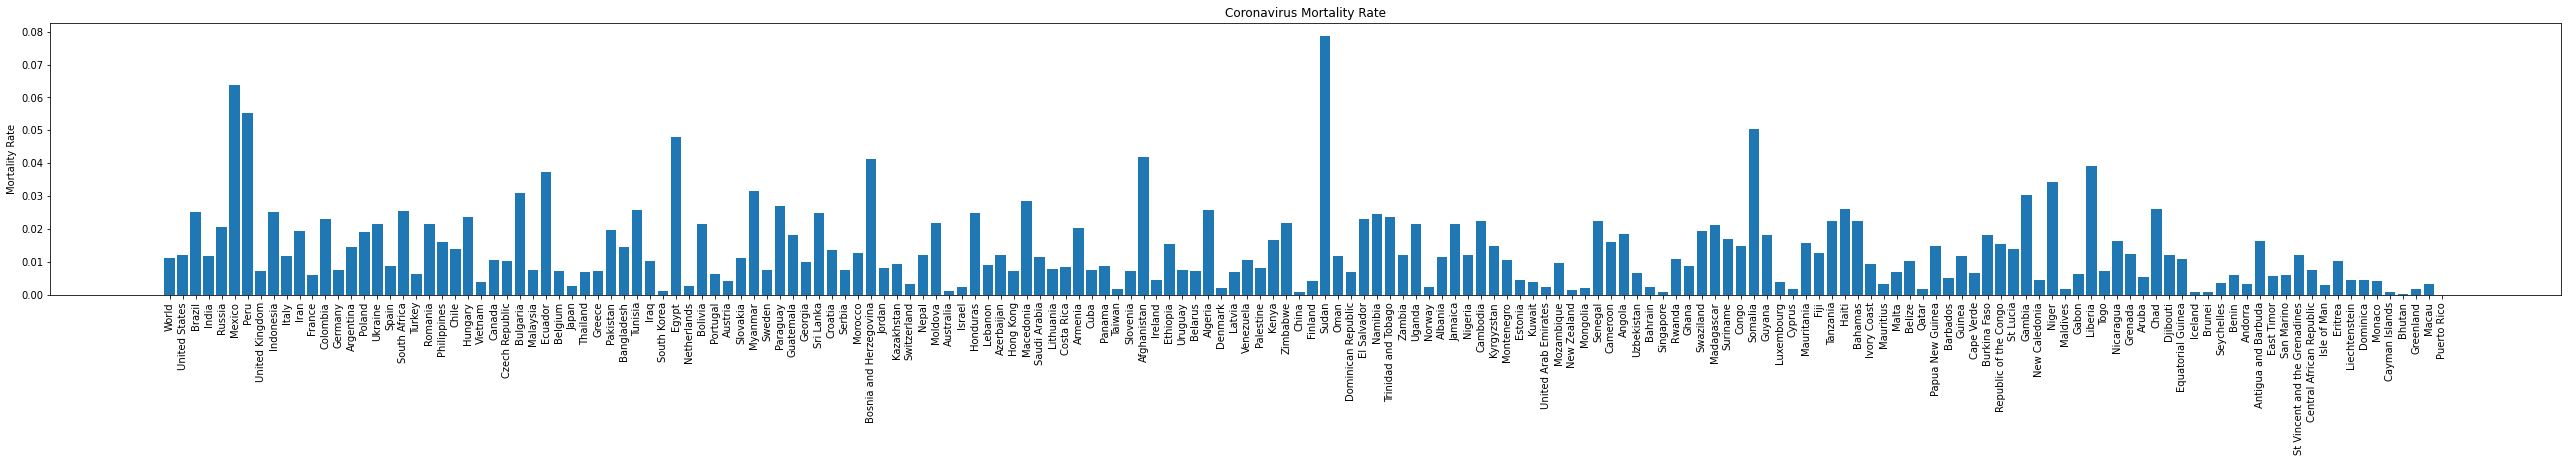

In [ ]:
bar(df['country'], cdr, 'Coronavirus Mortality Rate', 'Mortality Rate')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install Geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 6.3 MB 54.8 MB/s 
     |████████████████████████████████| 16.7 MB 61.4 MB/s 


In [ ]:
import geopandas as gpd

SHAPEFILE = '/content/ne_10m_admin_0_countries_chn.shp'

geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']

geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

In [ ]:
def map(country, data, col, cmap, title):
  country = list(country)
  try:
    i = country.index('United States')
    country[i] = 'United States of America'
  except ValueError: pass
  d = {'country':country, col:data}
  df =pd.DataFrame(d)
  merged = pd.merge(left = geo_df, right = df)
  min = merged[col].min()
  max = merged[col].max()
  cmap = cmap
  fig, ax = plt.subplots(1, figsize=(20, 8))

  ax.axis('off')
  merged.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
  ax.set_title(title)
  sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min, vmax=max), cmap=cmap)
  fig.colorbar(sm)

### Covid-19 Cases

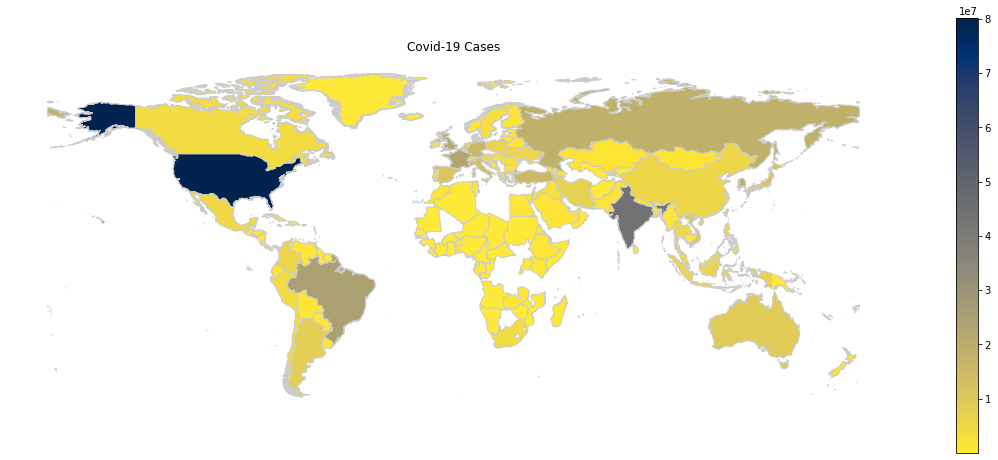

In [ ]:
map(cc['country'], list(cc['last']), 'covid cases', 'cividis_r', 'Covid-19 Cases')

### Covid-19 Deaths

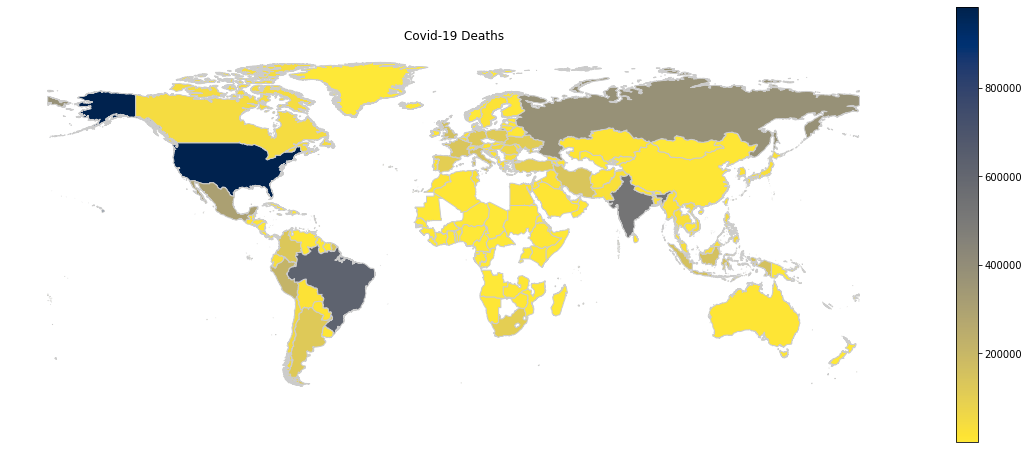

In [ ]:
map(cd['country'], list(cd['last']), 'covid death', 'cividis_r', 'Covid-19 Deaths')

### Covid-19 Death Rate

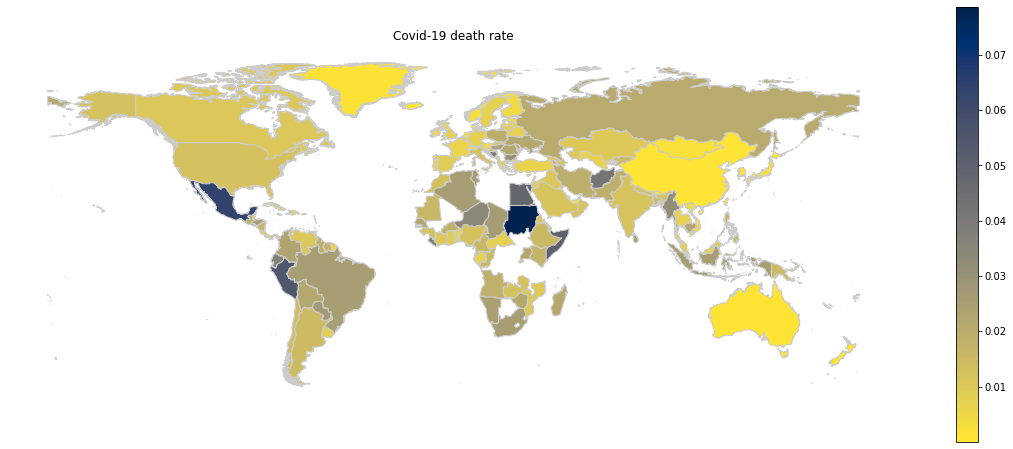

In [ ]:
map(df['country'], list(cdr), 'covid death rate', 'cividis_r', 'Covid-19 death rate')

### Covid-19 Vaccination Rate

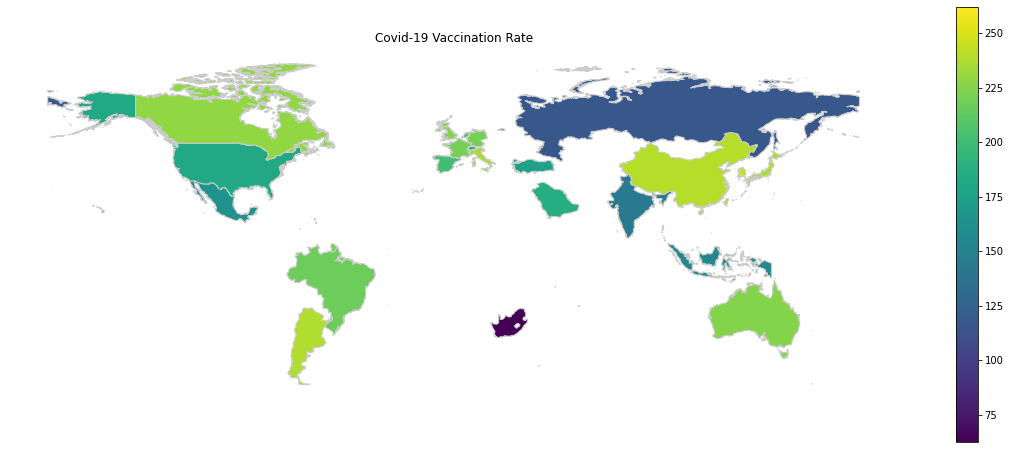

In [ ]:
map(cvr['country'], list(cvr['last']), 'covid vac','viridis', 'Covid-19 Vaccination Rate')

### Hospital Bed Rate

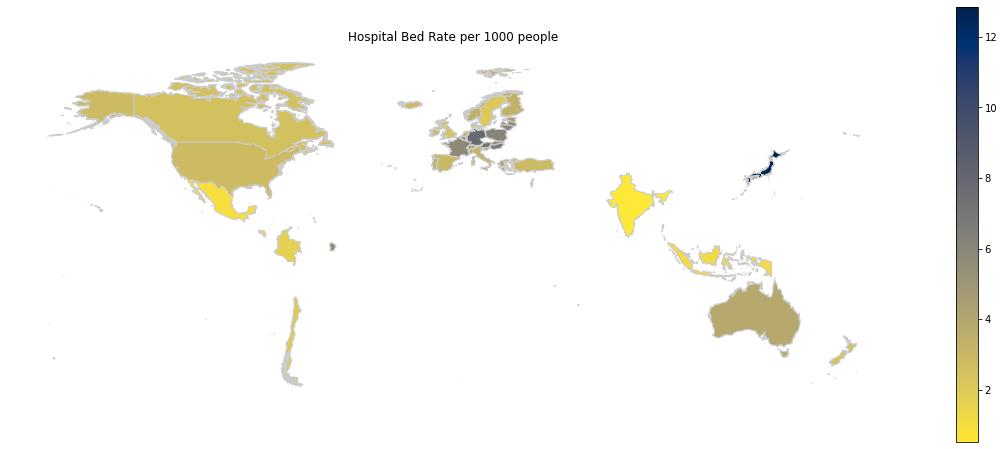

In [ ]:
map(hb['country'], list(hb['last']), 'hb rate', 'cividis_r','Hospital Bed Rate per 1000 people')

### Hospital Rate

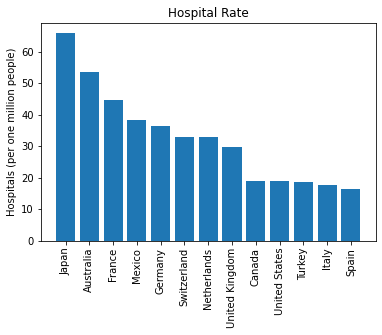

In [ ]:
bar(hospital['country'], hospital['last'], 'Hospital Rate','Hospitals (per one million people)')

### ICU Beds 

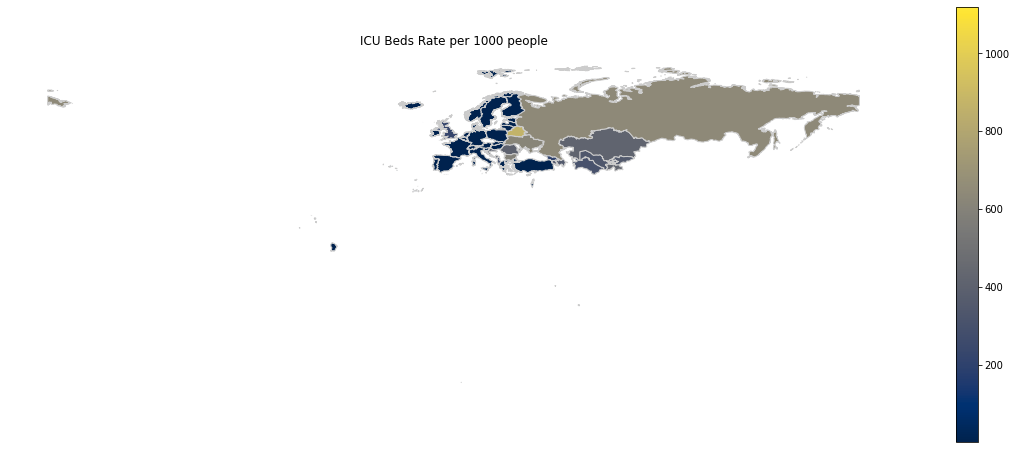

In [ ]:
map(icu['country'], list(icu['last']), 'icu rate', 'cividis','ICU Beds Rate per 1000 people')

### Doctor

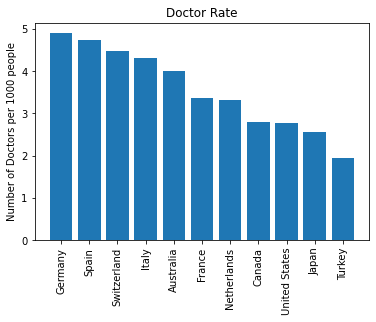

In [ ]:
bar(doctor['country'], doctor['last'], 'Doctor Rate', 'Number of Doctors per 1000 people')

### Nurse

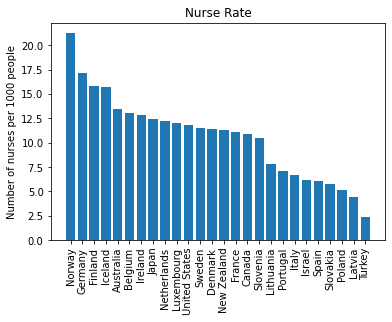

In [ ]:
bar(nurse['country'], nurse['last'], 'Nurse Rate', 'Number of nurses per 1000 people')

### GDP Growth Rate （2022）

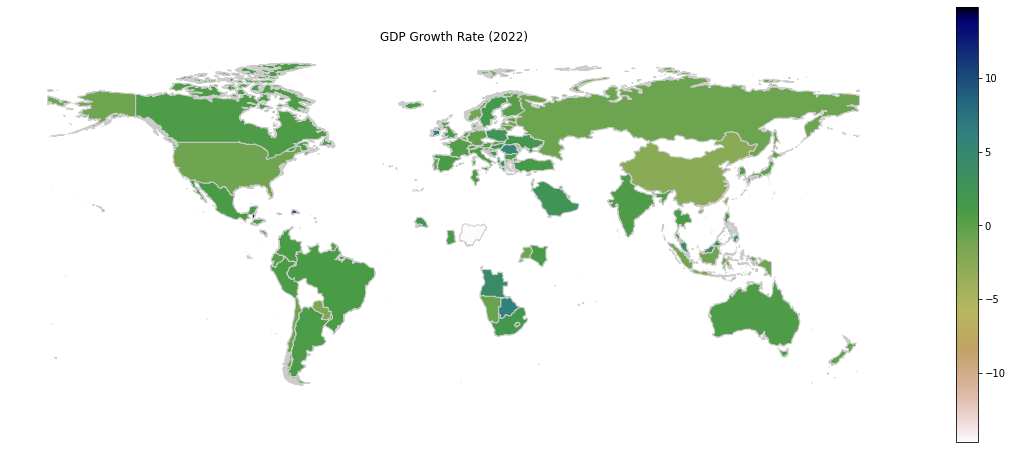

In [ ]:
map(gdp['country'], list(gdp['last']), 'gdp grwoth', 'gist_earth_r', 'GDP Growth Rate (2022)')

### GDP Growth Rate (previous term)

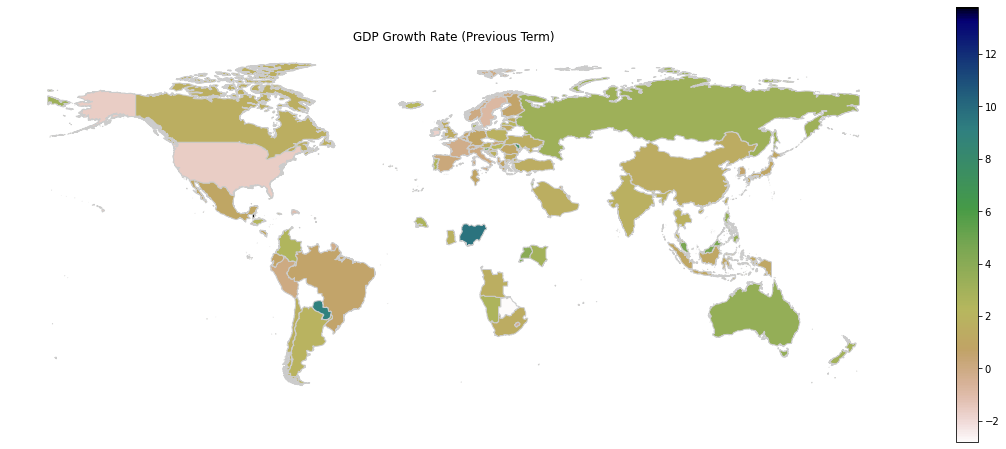

In [ ]:
map(gdp['country'], list(gdp['previoius']), 'gdp grwoth last year', 'gist_earth_r', 'GDP Growth Rate (Previous Term)')

### Annual GDP Growth Rate

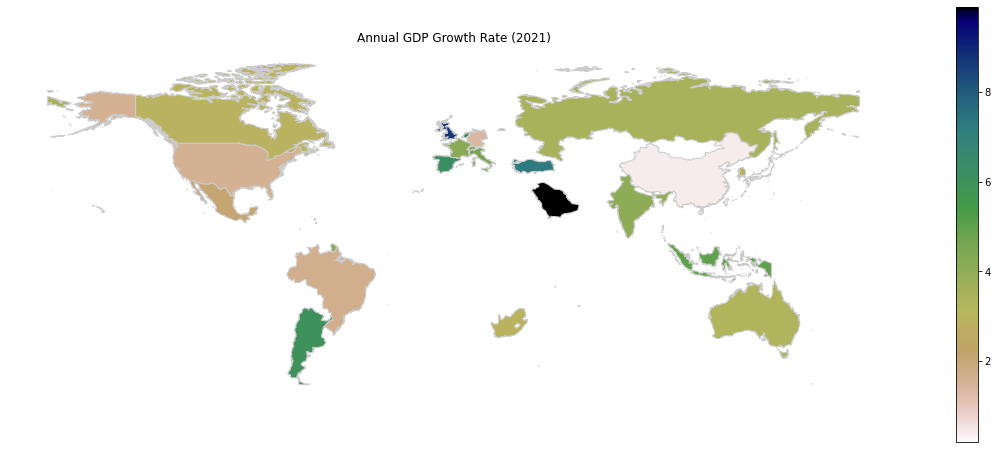

In [ ]:
map(gdp_annual_growth['country'], list(gdp_annual_growth['last']), 'gdp grwoth last year', 'gist_earth_r', 'Annual GDP Growth Rate (2021)')

### Interst Rate

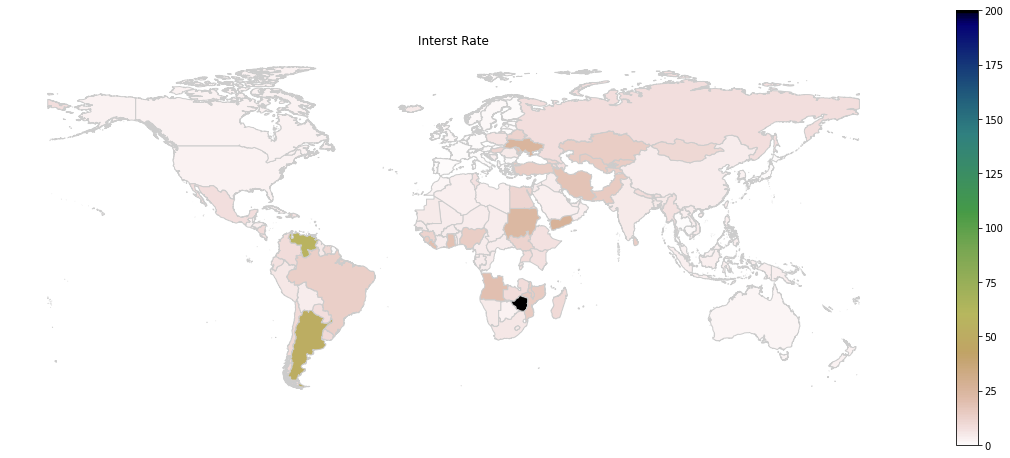

In [ ]:
map(interest['country'], list(interest['last']), 'interst', 'gist_earth_r', 'Interst Rate')

### Inflation

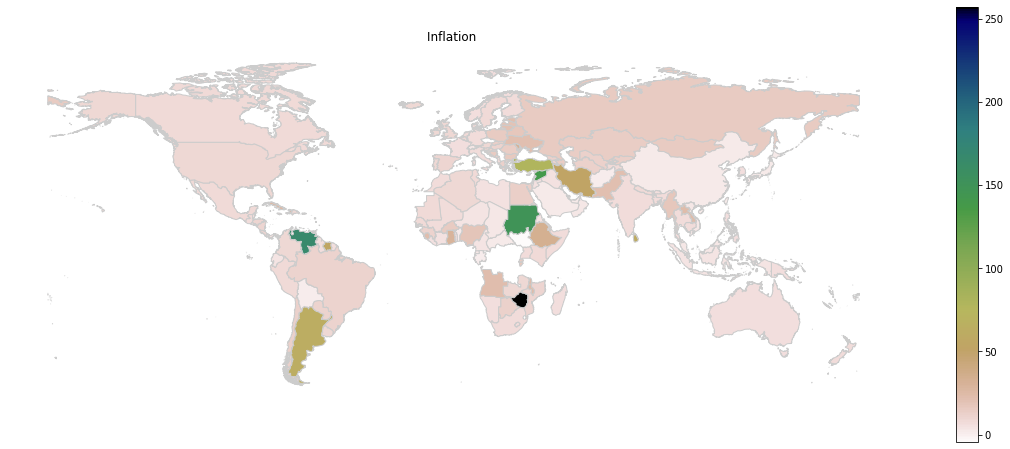

In [ ]:
map(inflation['country'], list(inflation['last']), 'inflation', 'gist_earth_r', 'Inflation ')

### Unemployment

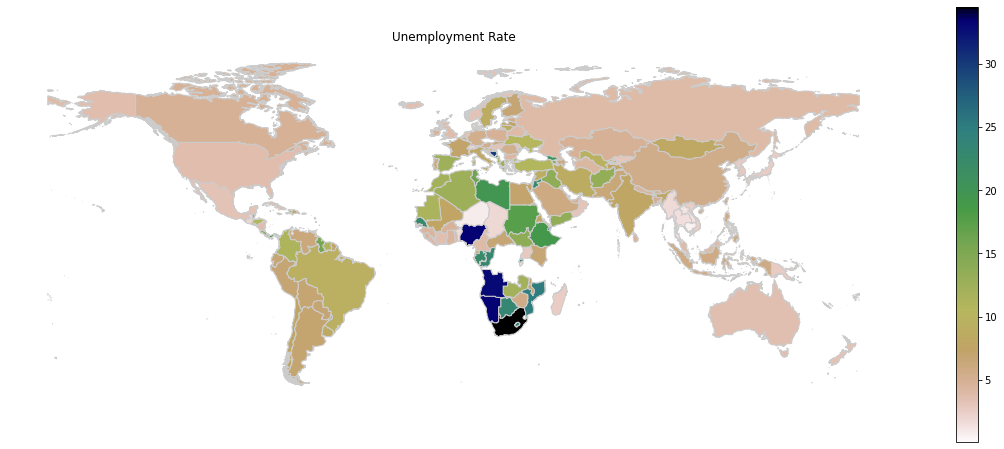

In [ ]:
map(unemploy['country'], list(unemploy['last']), 'unemploy', 'gist_earth_r', 'Unemployment Rate')

### GDP per Capita

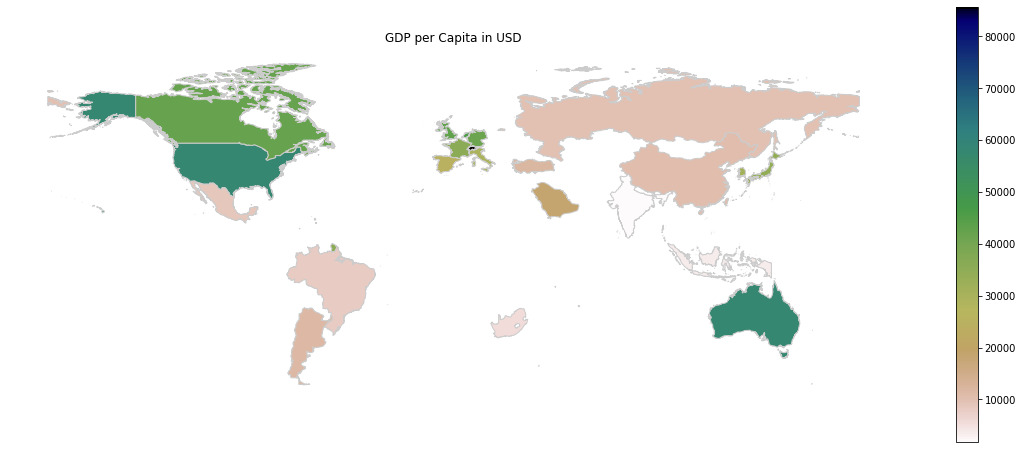

In [ ]:
map(gdp_per_capita['country'], list(gdp_per_capita['previoius']), 'gpc', 'gist_earth_r', 'GDP per Capita in USD')

### GDP per Capita (PPP)

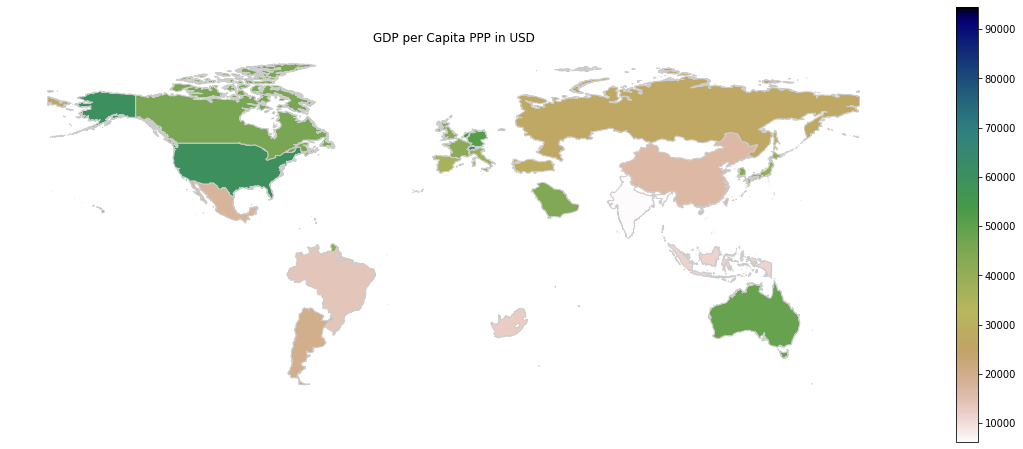

In [ ]:
map(gdpcppp['country'], list(gdpcppp['previoius']), 'gdpcppp', 'gist_earth_r', 'GDP per Capita PPP in USD')

### CPI

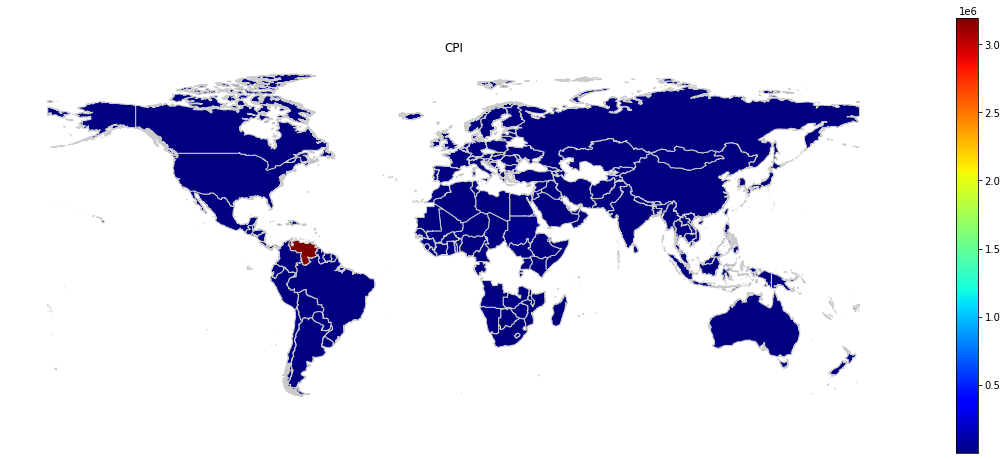

In [ ]:
map(cpi['country'], list(cpi['last']), 'cpi', 'jet','CPI')

### Food Inflation

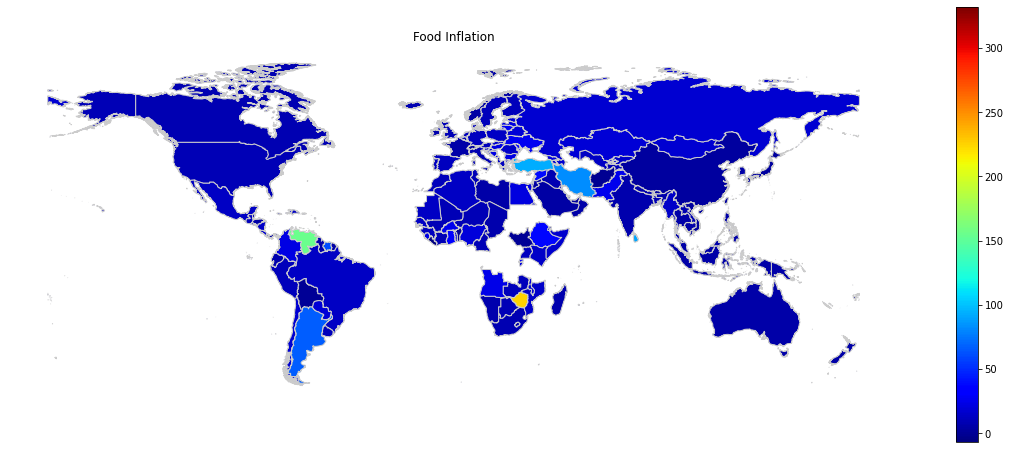

In [ ]:
map(food_inflation['country'], list(food_inflation['last']), 'food_inflation', 'jet','Food Inflation')

### Core Consumer Prices

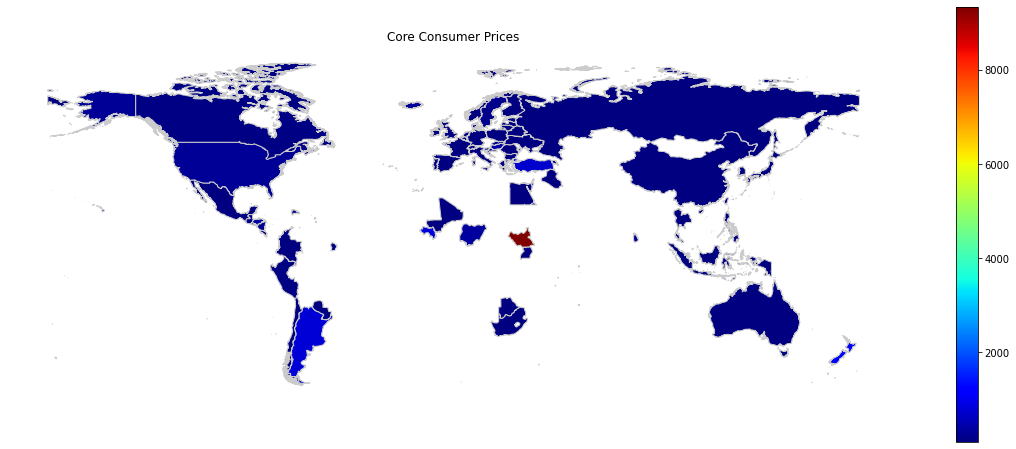

In [ ]:
map(core_consumer_prices['country'], list(core_consumer_prices['last']), 'core', 'jet','Core Consumer Prices')

### Core Inflation

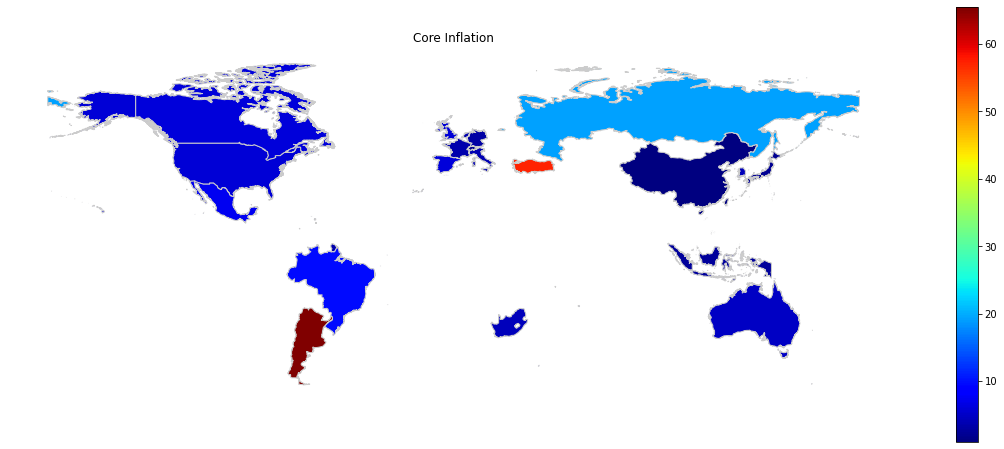

In [ ]:
map(core_inflation['country'], list(core_inflation['last']), 'core', 'jet','Core Inflation')

### Inflation Expectation

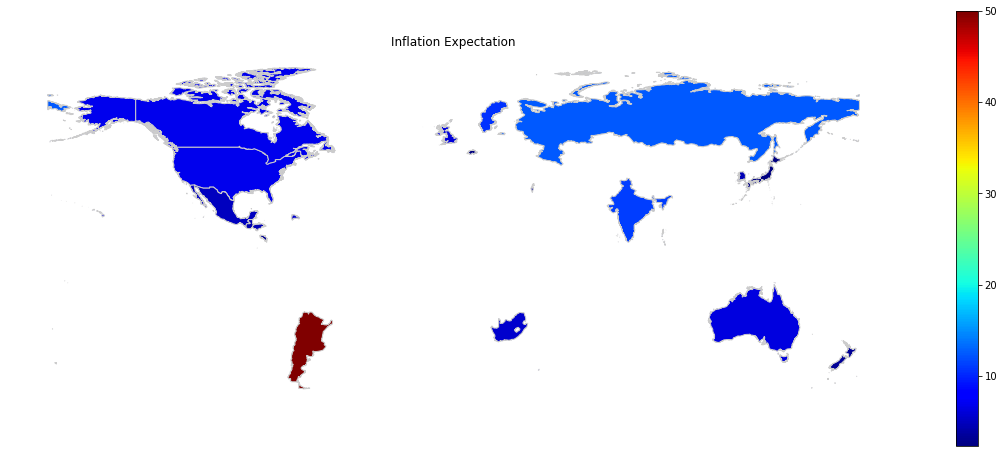

In [ ]:
map(inflation_expectation['country'], list(inflation_expectation['last']), 'ie', 'jet','Inflation Expectation')

### IP

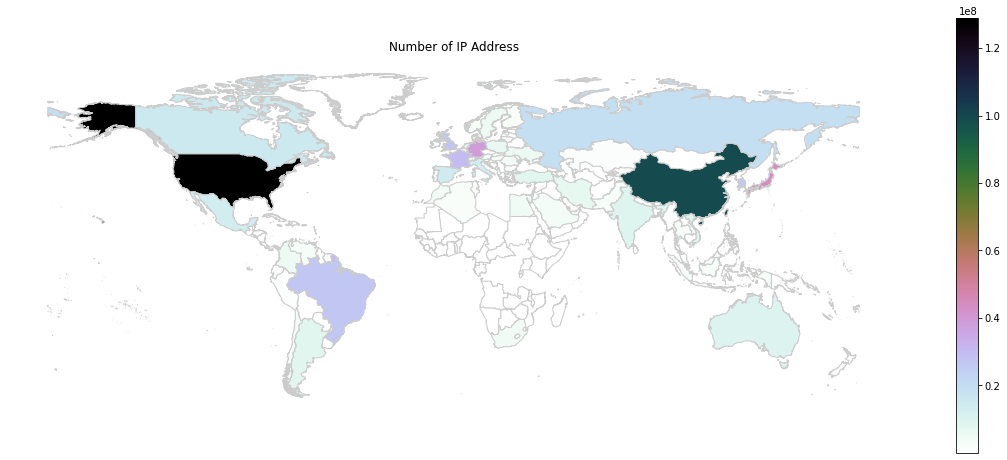

In [ ]:
map(ip['country'], list(ip['last']), 'ip', 'cubehelix_r','Number of IP Address')

### Internet Speed

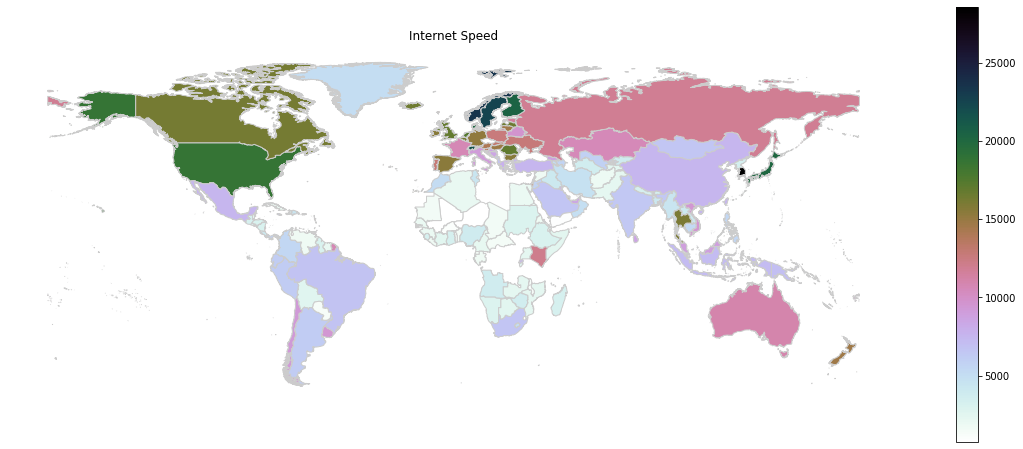

In [ ]:
map(inter_speed['country'], list(inter_speed['last']), 'speed', 'cubehelix_r','Internet Speed')

### Industrial Production

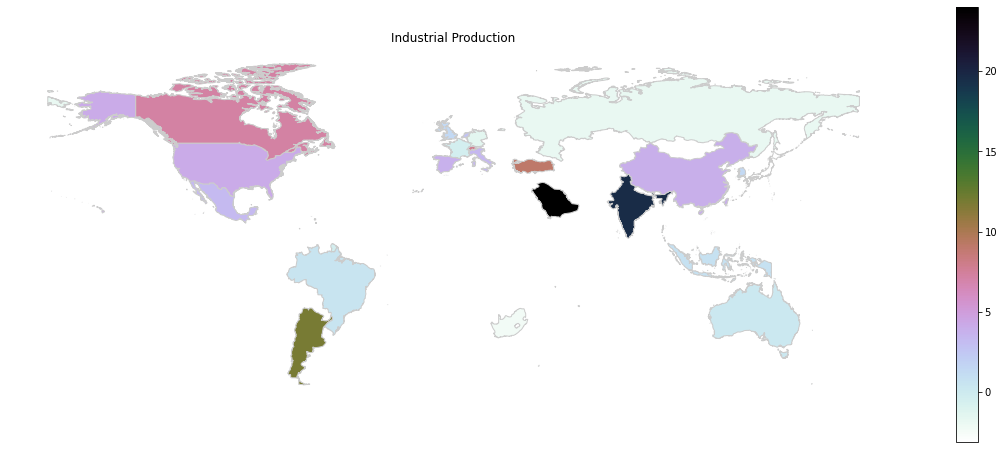

In [ ]:
map(production['country'], list(production['last']), 'p', 'cubehelix_r','Industrial Production')

### Electricity Production

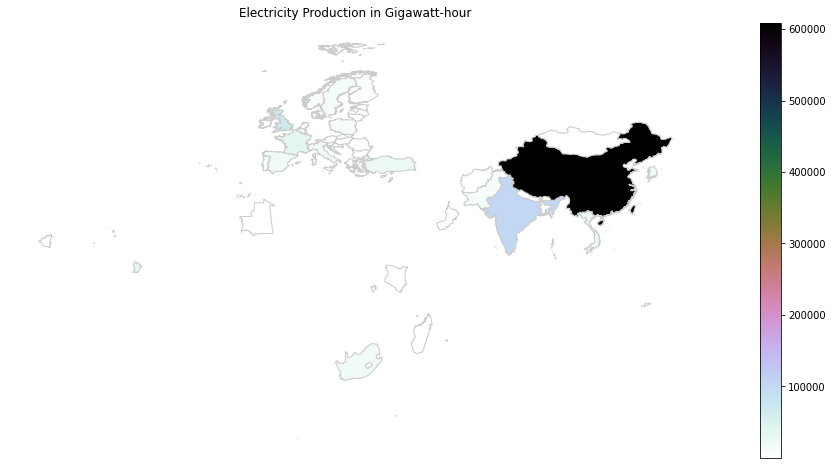

In [ ]:
map(e_production['country'], list(e_production['last']), 'p', 'cubehelix_r','Electricity Production in Gigawatt-hour')

### Mining Production

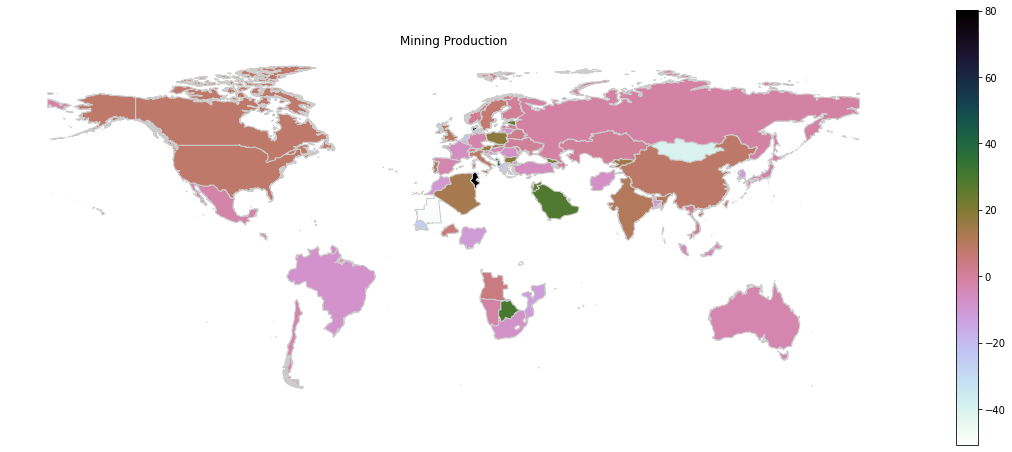

In [ ]:
map(m_production['country'], list(m_production['last']), 'p', 'cubehelix_r','Mining Production')

### Steel Production

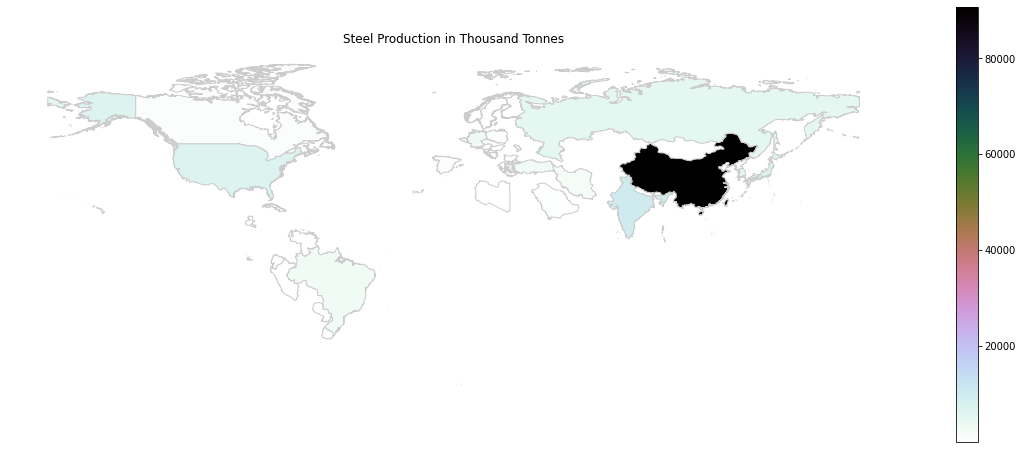

In [ ]:
map(s_production['country'], list(s_production['last']), 'p', 'cubehelix_r','Steel Production in Thousand Tonnes')

### Service PMI

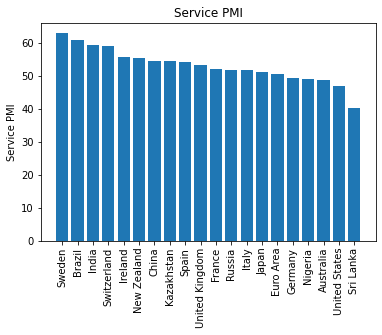

In [ ]:
bar(s_pmi['country'], s_pmi['last'], 'Service PMI', 'Service PMI')

### Number of Oil Rigs

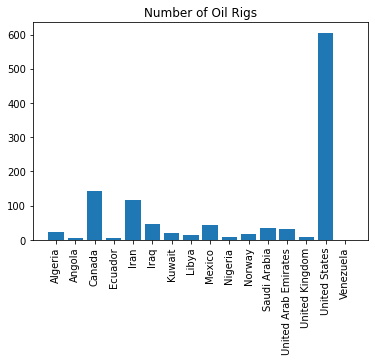

In [ ]:
bar(oil_rigs['country'], oil_rigs['last'], 'Number of Oil Rigs', '')

### Bankruptcies

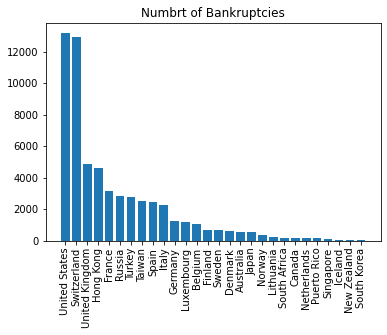

In [ ]:
bar(bankrupt['country'], bankrupt['last'], 'Numbrt of Bankruptcies', '')

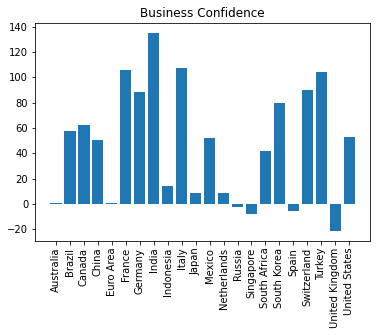

In [ ]:
bar(buz_confidence['country'], buz_confidence['last'], 'Business Confidence', '')

### Capacity Utilization

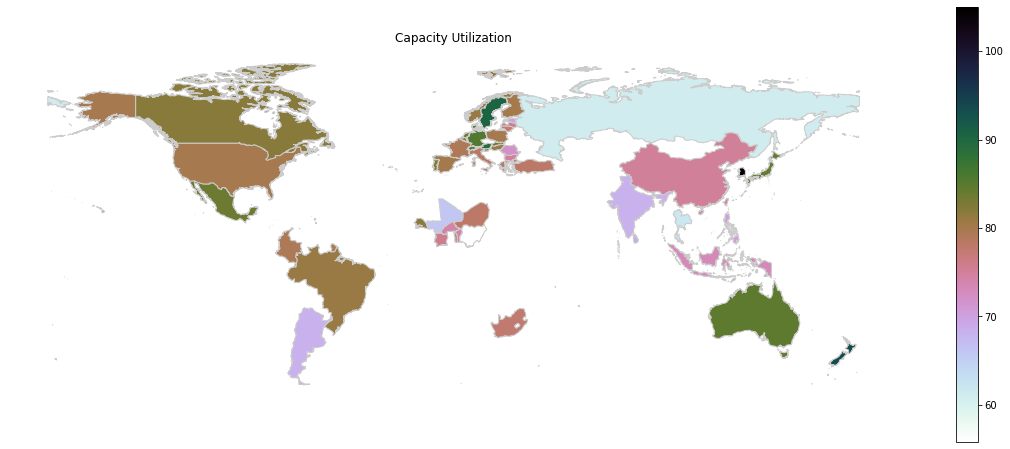

In [ ]:
map(capacity_utilization['country'], list(capacity_utilization['last']), 'cu', 'cubehelix_r','Capacity Utilization')

### Bank Lending Rate

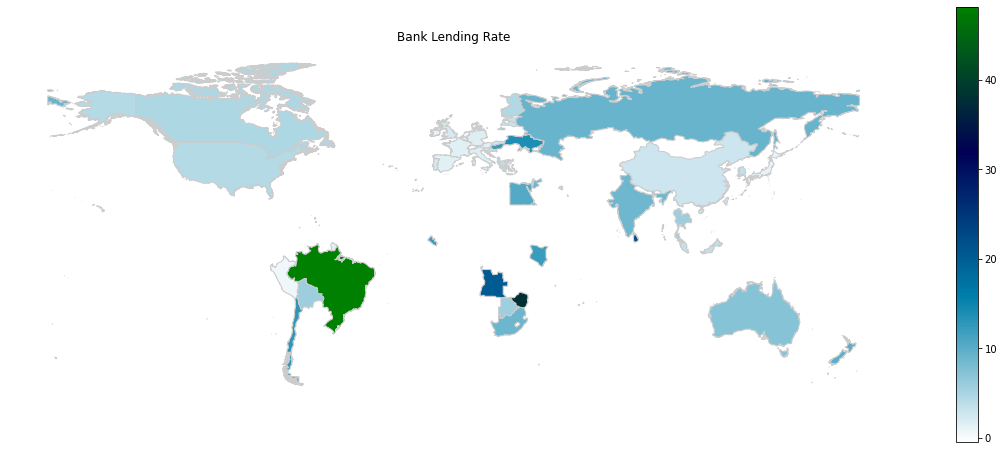

In [ ]:
map(bank_lend['country'], list(bank_lend['last']), 'bl', 'ocean_r','Bank Lending Rate')

### Consumer Confidence

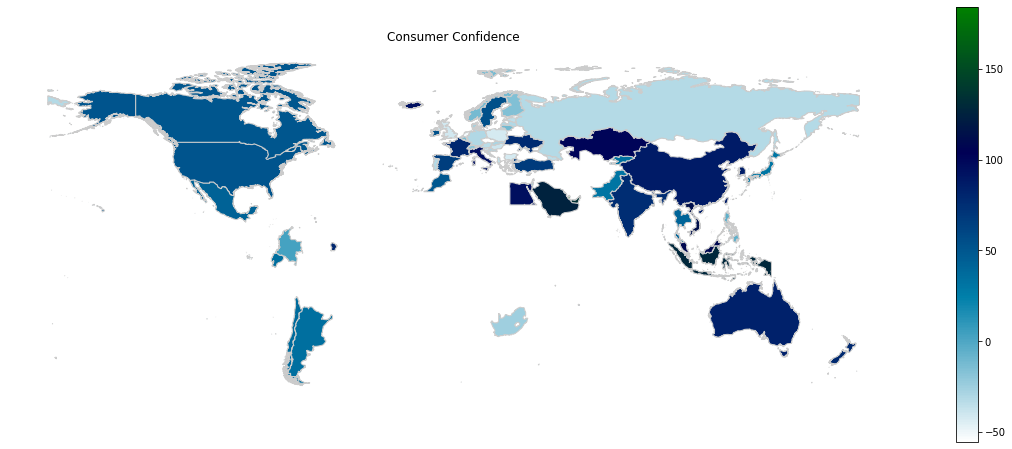

In [ ]:
map(consumer_confidence['country'], list(consumer_confidence['last']), 'c_c', 'ocean_r','Consumer Confidence')

### Houshold Debt to GDP

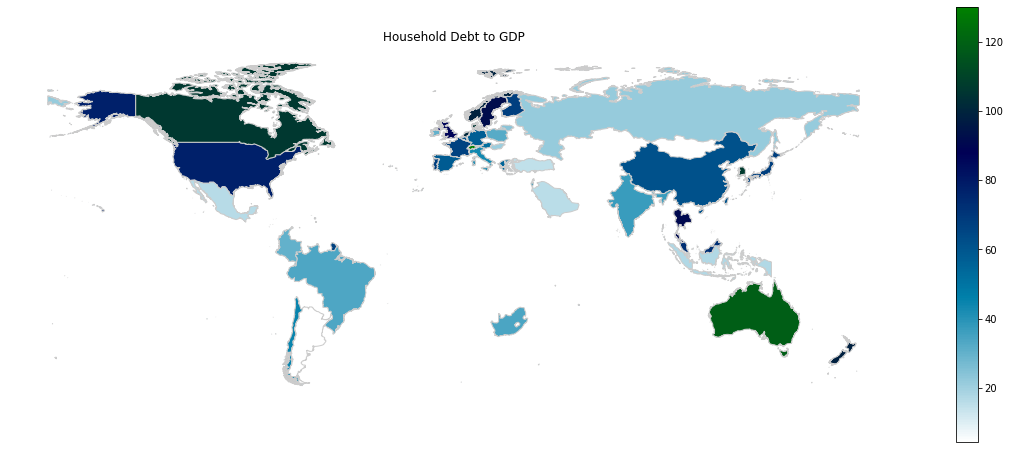

In [ ]:
map(hdg['country'], list(hdg['last']), 'hdg', 'ocean_r','Household Debt to GDP')

### Houeshold debt to income

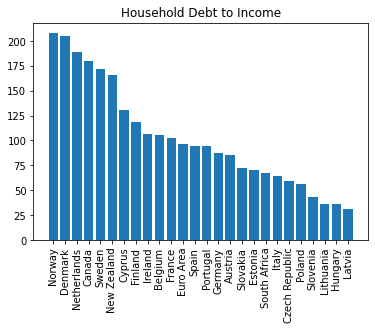

In [ ]:
bar(hdi['country'], list(hdi['last']),'Household Debt to Income','')

### Gasoline Price

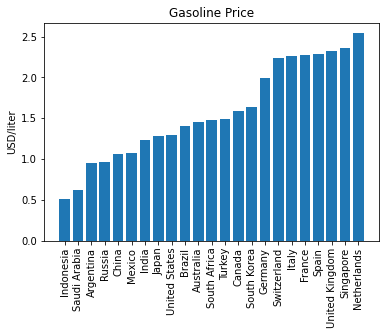

In [ ]:
bar(gasoline['country'], list(gasoline['last']),'Gasoline Price','USD/liter')

### House Own Percentage

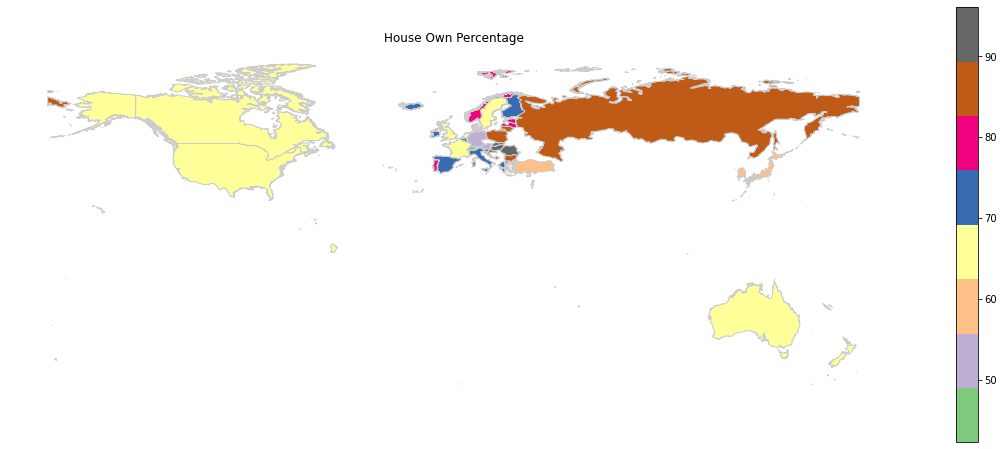

In [ ]:
map(house_own['country'], list(house_own['last']), 'house_own', 'Accent','House Own Percentage')

### Construction

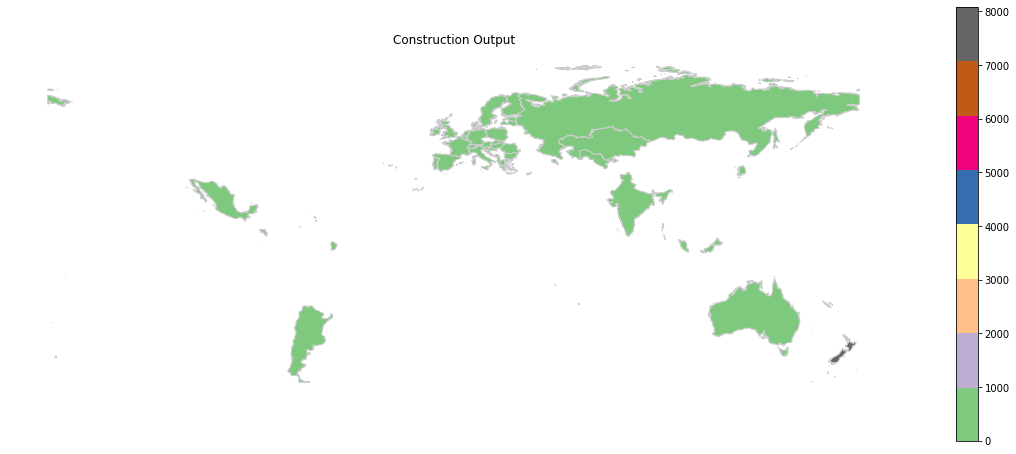

In [ ]:
map(construction['country'], list(construction['last']), 'construction', 'Accent','Construction Output')

### House Price to Rent

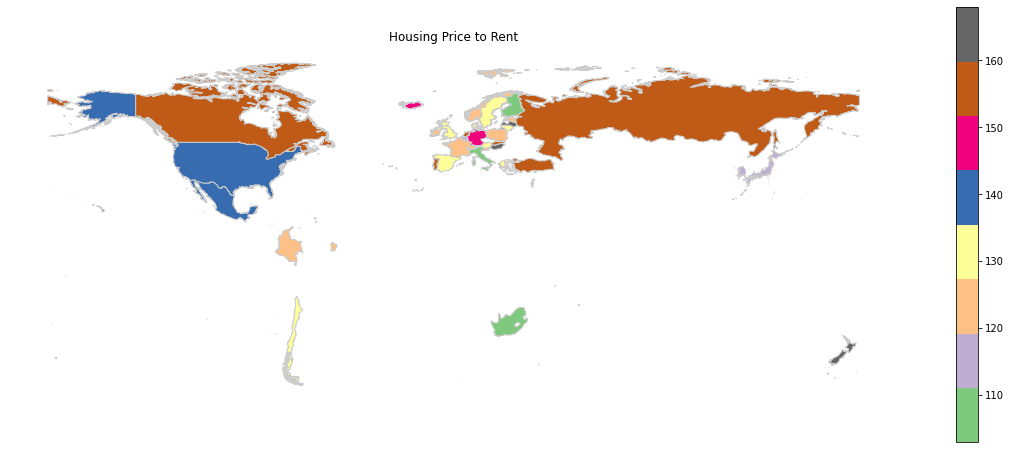

In [ ]:
map(price2rent['country'], list(price2rent['last']), 'price2rent', 'Accent','Housing Price to Rent')

### Cash Reserve Ratio

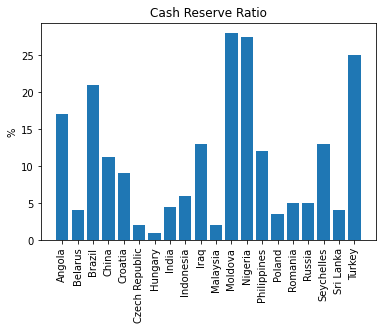

In [ ]:
bar(cash_reserve['country'], list(cash_reserve['last']),'Cash Reserve Ratio','%')

### Deposit Interst

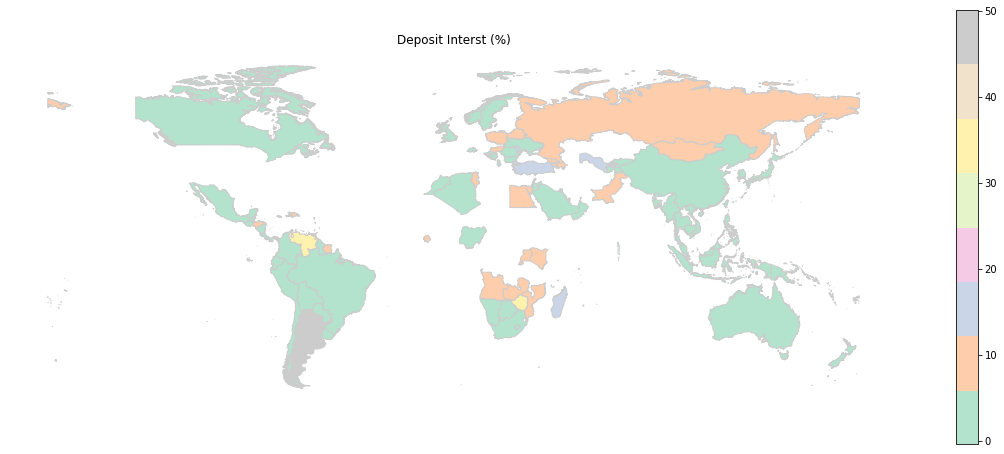

In [ ]:
map(deposit_interst['country'], list(deposit_interst['last']), 'deposit interest', 'Pastel2','Deposit Interst (%)')

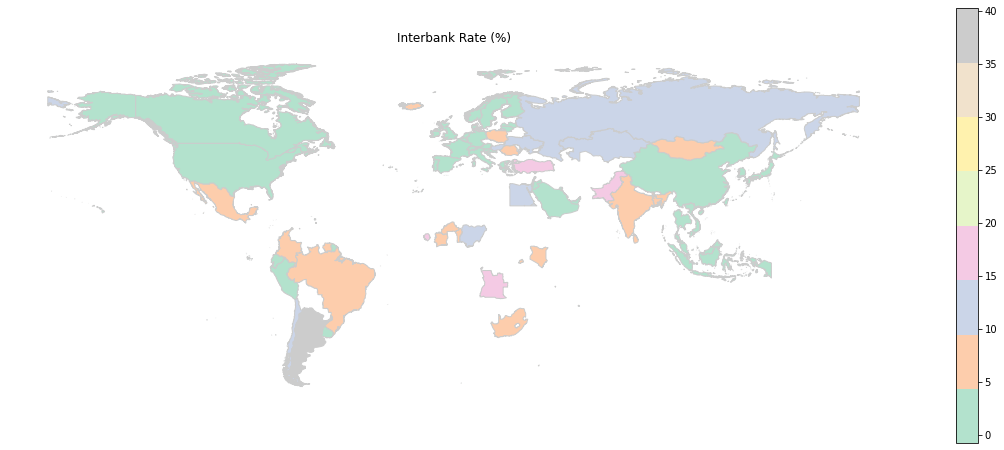

In [ ]:
map(interbank['country'], list(interbank['last']), 'interbank', 'Pastel2','Interbank Rate (%)')

### Loan Growth

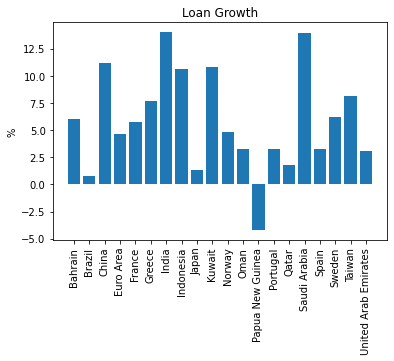

In [ ]:
bar(lg['country'], lg['last'], 'Loan Growth', '%')


### Government Debt to GDP



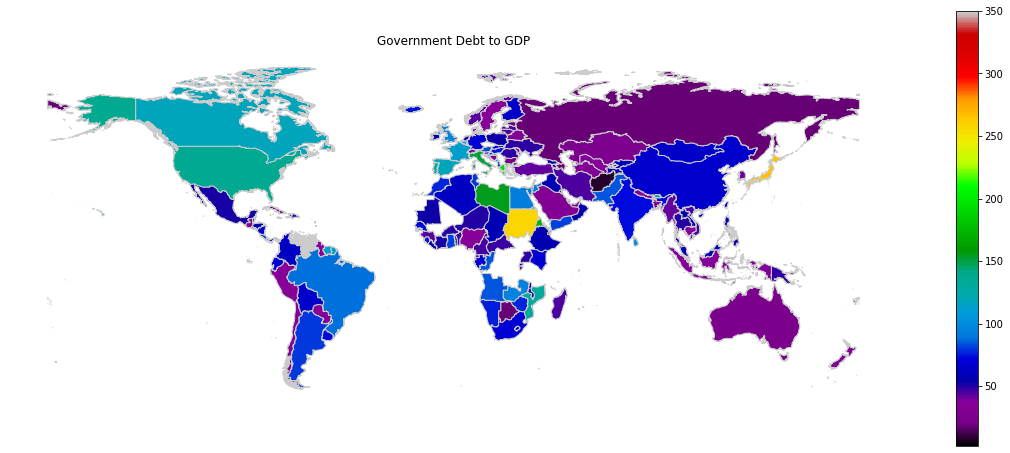

In [ ]:
map(gov_debt2gdp['country'], list(gov_debt2gdp['last']), 'gov_debt2gdp', 'nipy_spectral','Government Debt to GDP')

### Gobernment Spending to GDP

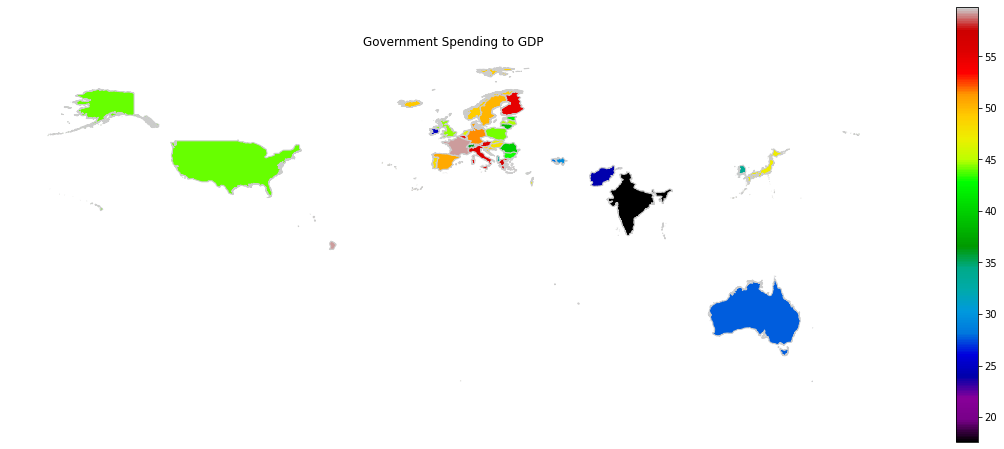

In [ ]:
map(gov_spending2gdp['country'], list(gov_spending2gdp['last']), 'gov_spending2gdp', 'nipy_spectral','Government Spending to GDP')

### Millitary 

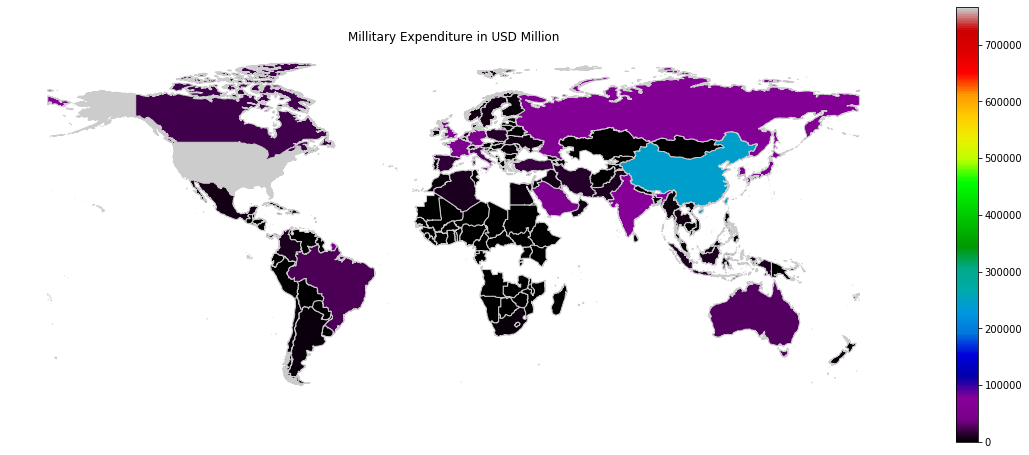

In [ ]:
map(millitary['country'], list(millitary['last']), 'millitary', 'nipy_spectral','Millitary Expenditure in USD Million')

### Asylum Application

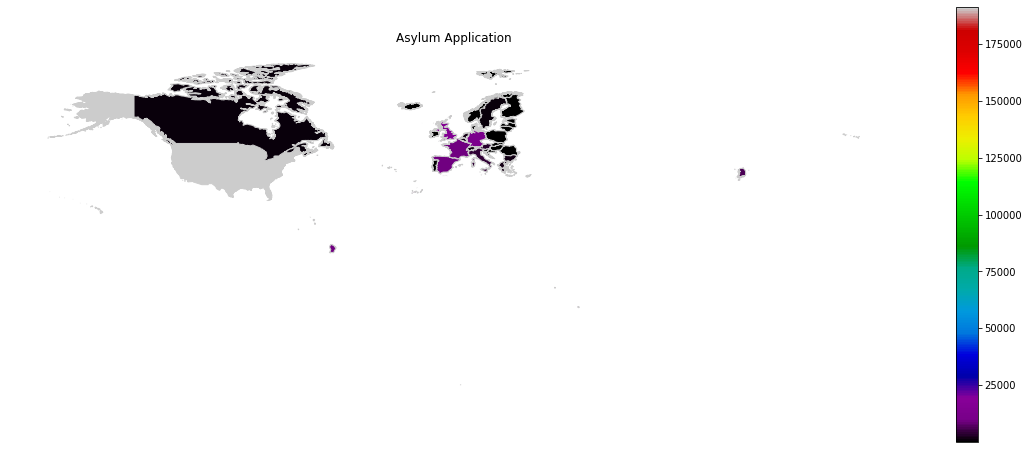

In [ ]:
map(asylum['country'], list(asylum['last']), 'asylum', 'nipy_spectral','Asylum Application')

### Labour Cost

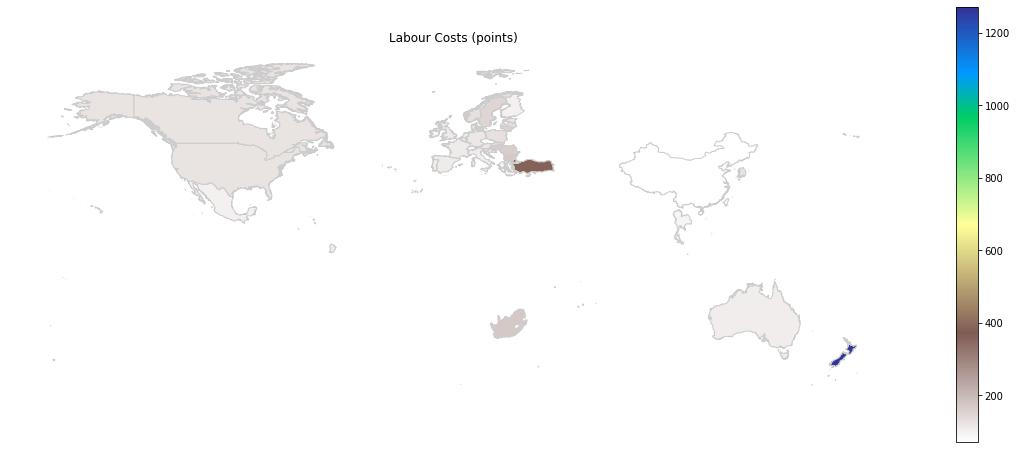

In [ ]:
map(labour_costs['country'], list(labour_costs['last']), 'lc', 'terrain_r','Labour Costs (points)')

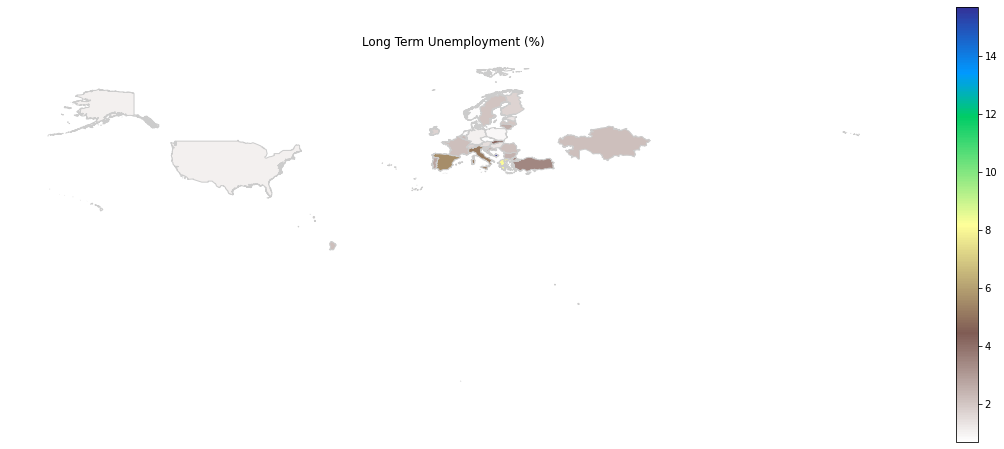

In [ ]:
map(long_term_unemploymet['country'], list(long_term_unemploymet['last']), 'lu', 'terrain_r','Long Term Unemployment (%)')

### Labour Force Participation

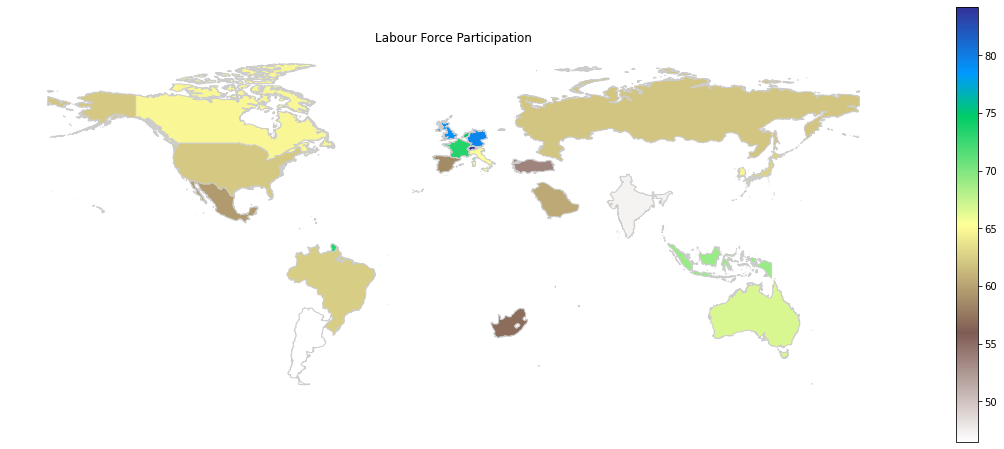

In [ ]:
map(labour_force_participation['country'], list(labour_force_participation['last']), 'lfp', 'terrain_r','Labour Force Participation')

### Productivity

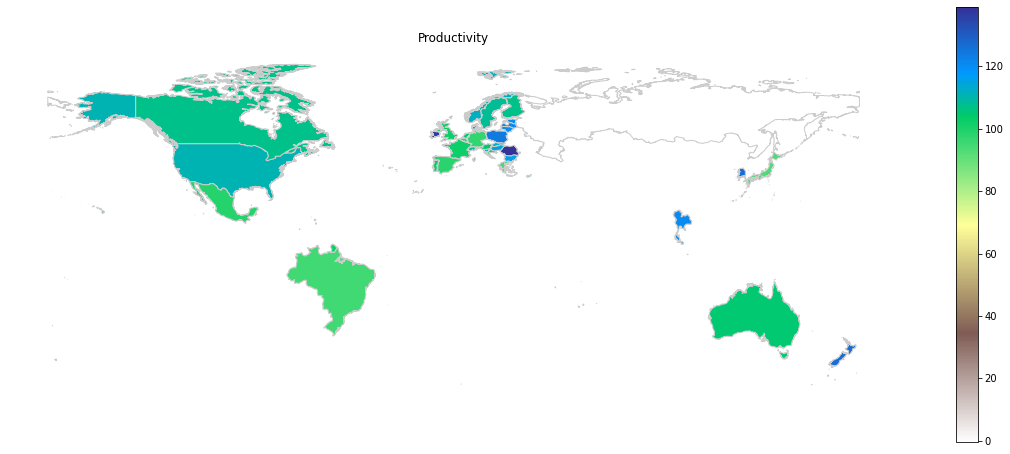

In [ ]:
map(productivity['country'], list(productivity['last']), 'lfp', 'terrain_r','Productivity')

### Wage Growth

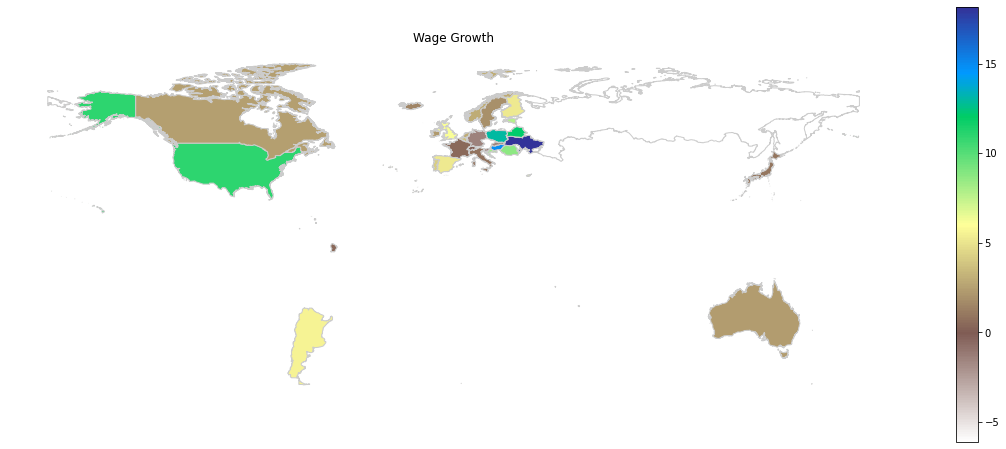

In [ ]:
map(wage_growth['country'], list(wage_growth['last']), 'lfp', 'terrain_r','Wage Growth')

### Youth Unemployment Rate

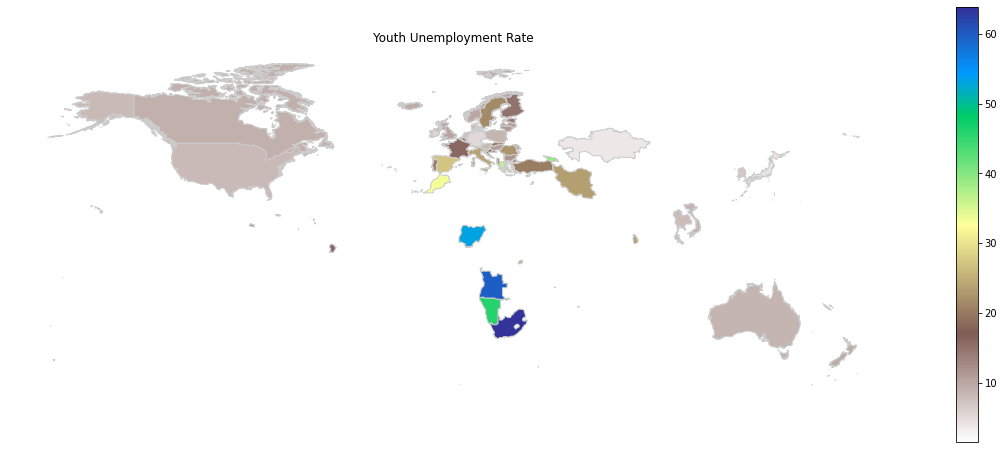

In [ ]:
map(youth_unemployment_rate['country'], list(youth_unemployment_rate['last']), 'lfp', 'terrain_r','Youth Unemployment Rate')

### Male Retire Age

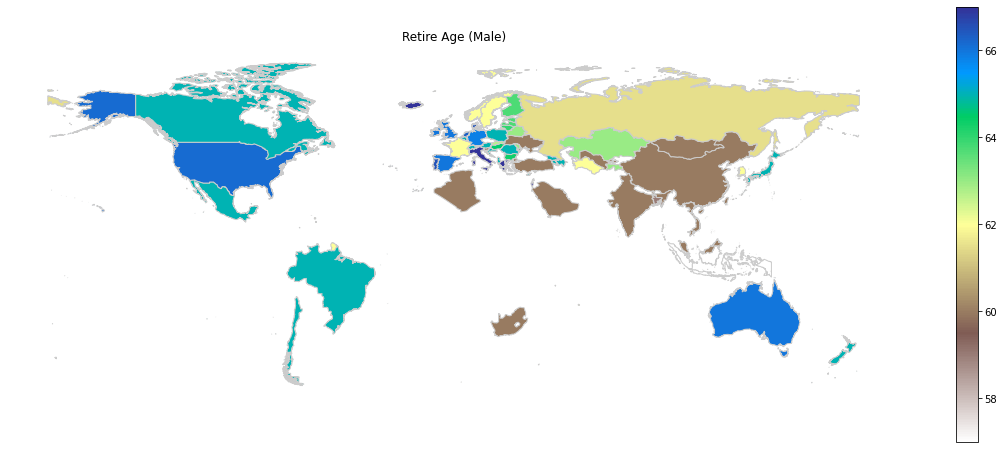

In [ ]:
map(m_retire['country'], list(m_retire['last']), 'lfp', 'terrain_r','Retire Age (Male)')

### Female Retire Age

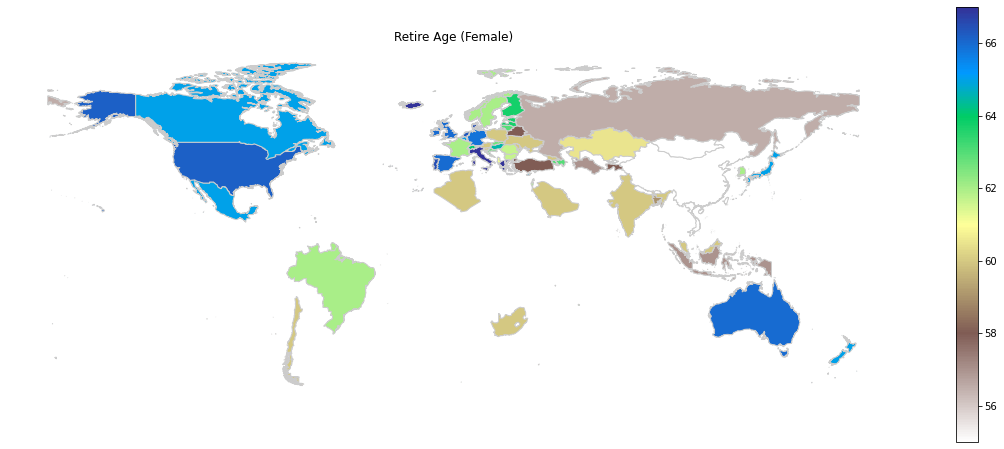

In [ ]:
map(w_retire['country'], list(w_retire['last']), 'lfp', 'terrain_r','Retire Age (Female)')

### Crude Oil Production

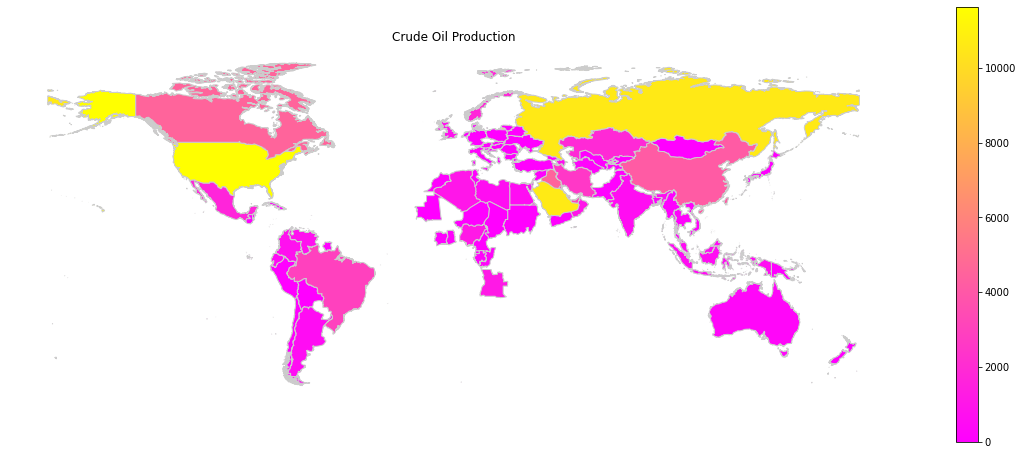

In [ ]:
map(crude_oil['country'], list(crude_oil['last']), 'lfp', 'spring','Crude Oil Production')

### Term of Trade

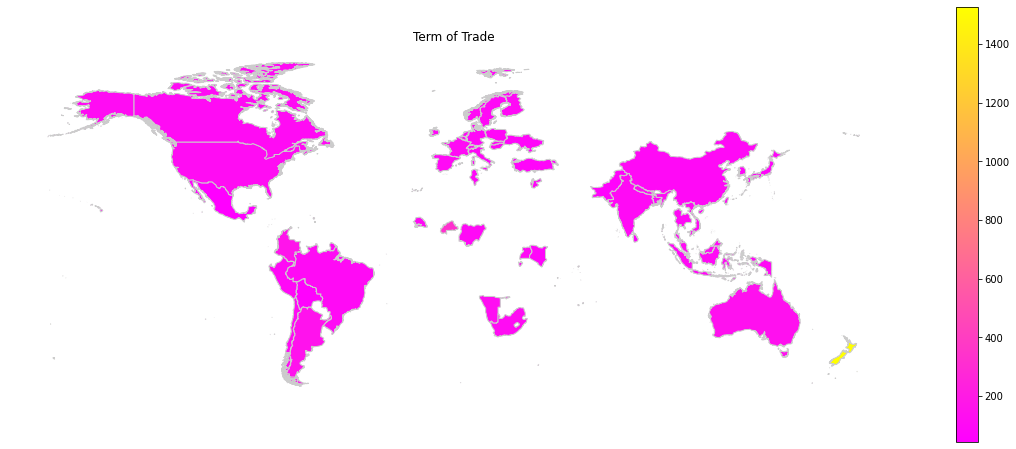

In [ ]:
map(toft['country'], list(toft['last']), 'lfp', 'spring','Term of Trade')

### Terrorist Index

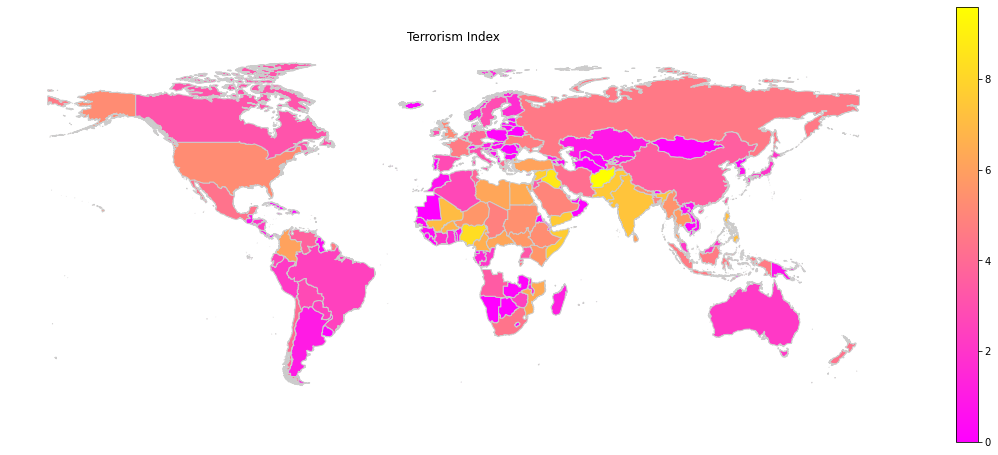

In [ ]:
map(terr['country'], list(terr['last']), 'lfp', 'spring','Terrorism Index')

### Weapon Sales

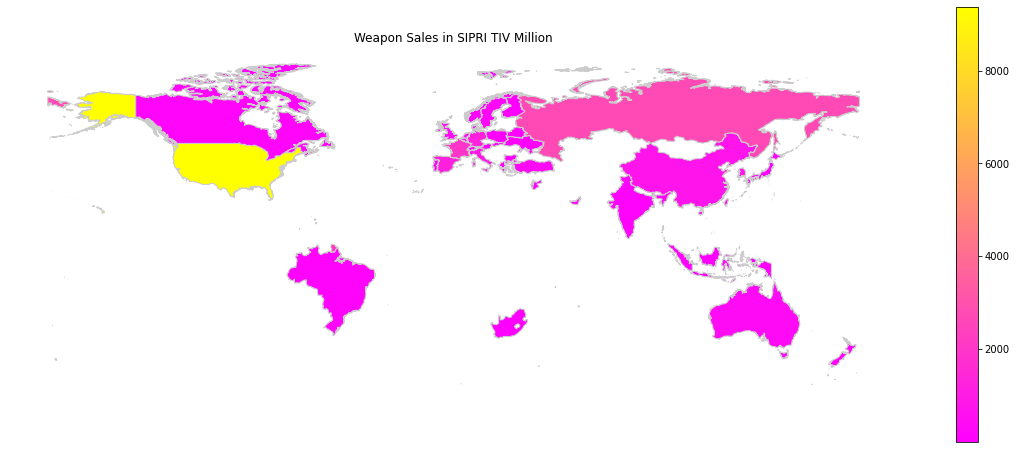

In [ ]:
map(weapon['country'], list(weapon['last']), 'lfp', 'spring','Weapon Sales in SIPRI TIV Million')